# Transcriptomics analysis by matrix factorization

In [1]:
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
sys.path += ['../Src']

In [3]:
import importlib
import factor_clustering
importlib.reload(factor_clustering)
from factor_clustering import FactorClustering
from factorizer_wrappers import NMF_Factorizer, ICA_Factorizer, PCA_Factorizer

$V_t = W_tH_t $

## Perform multiple bootstrap repeat calculations of ICA, NMF and PCA and look at clustering

In [4]:
possible_datasets = {1: 'Mini_Test', 
                     2: 'AOCS_Protein', 
                     3: 'TCGA_OV_VST', 
                     4: 'Canon_N200'}

fc = FactorClustering(possible_datasets[2], n_repeats=50, method='bootstrap')
print("Starting analysis for", fc.basename)
print("Method:", fc.method)

fc.read_expression_matrix()

all_factos = [NMF_Factorizer, ICA_Factorizer, PCA_Factorizer]

Starting analysis for AOCS_Protein
Method: bootstrap
19730 genes
80 patients


## Computation and caching of bootstrapped samples
For each of NMF, ICA and PCA We compute and cache 50 repeat factorizations over a range of component numbers.  A bootstrap sample is created having same number of patients, sampled *with* replacement.

In [5]:
nc_list = range(2, 14)

In [6]:
if True:
    # Beware - this could take hours (for the full size dataset)!
    fc.compute_and_cache_multiple_factor_repeats(nc_list, force=False)

All Done.


## t-SNE plots per factorization method
These demonstrate visually how robust are the factors.  The median point for each cluster is indicated with a black '+'.

............

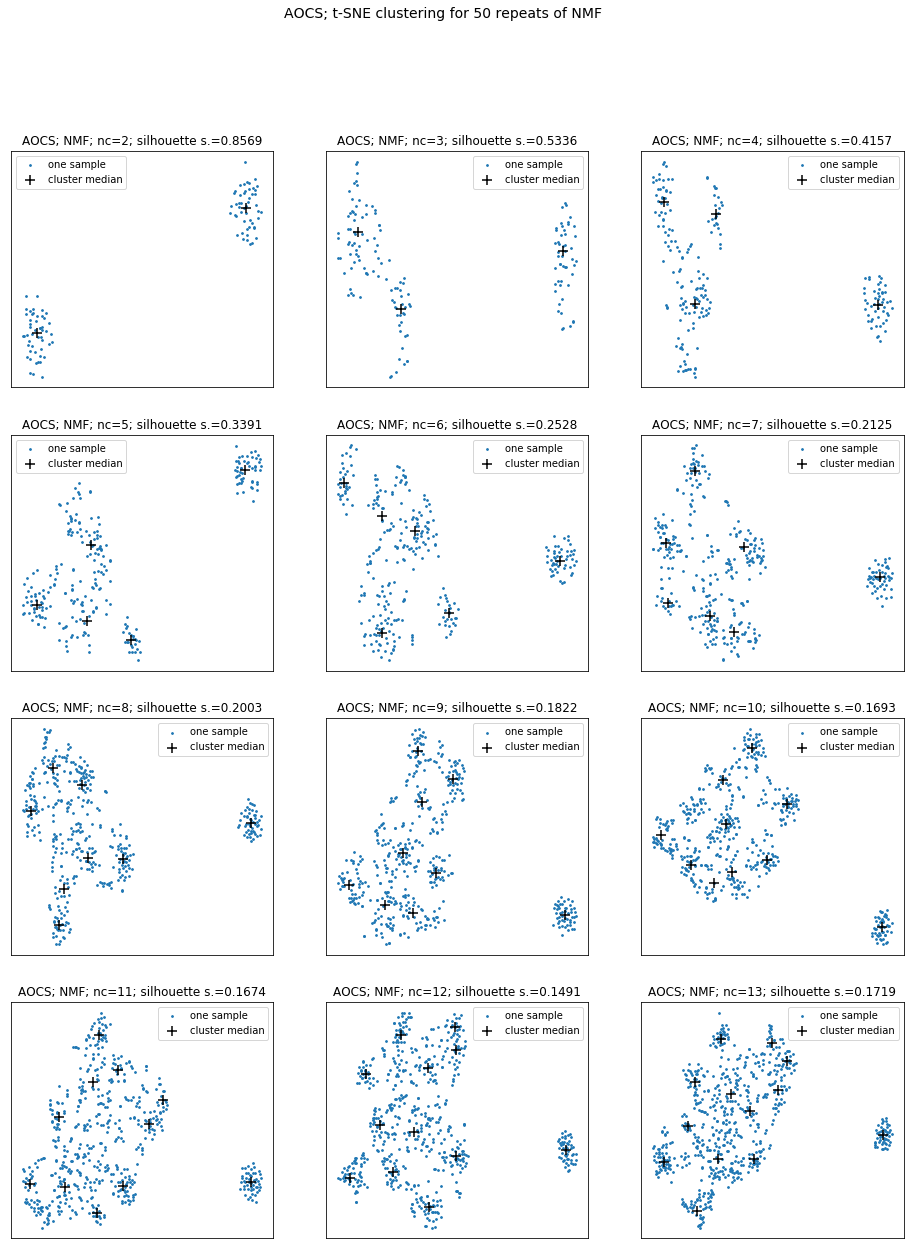

In [7]:
if True:
    fc.plot_multiple_single_factors_scatter(NMF_Factorizer, nc_list)

............

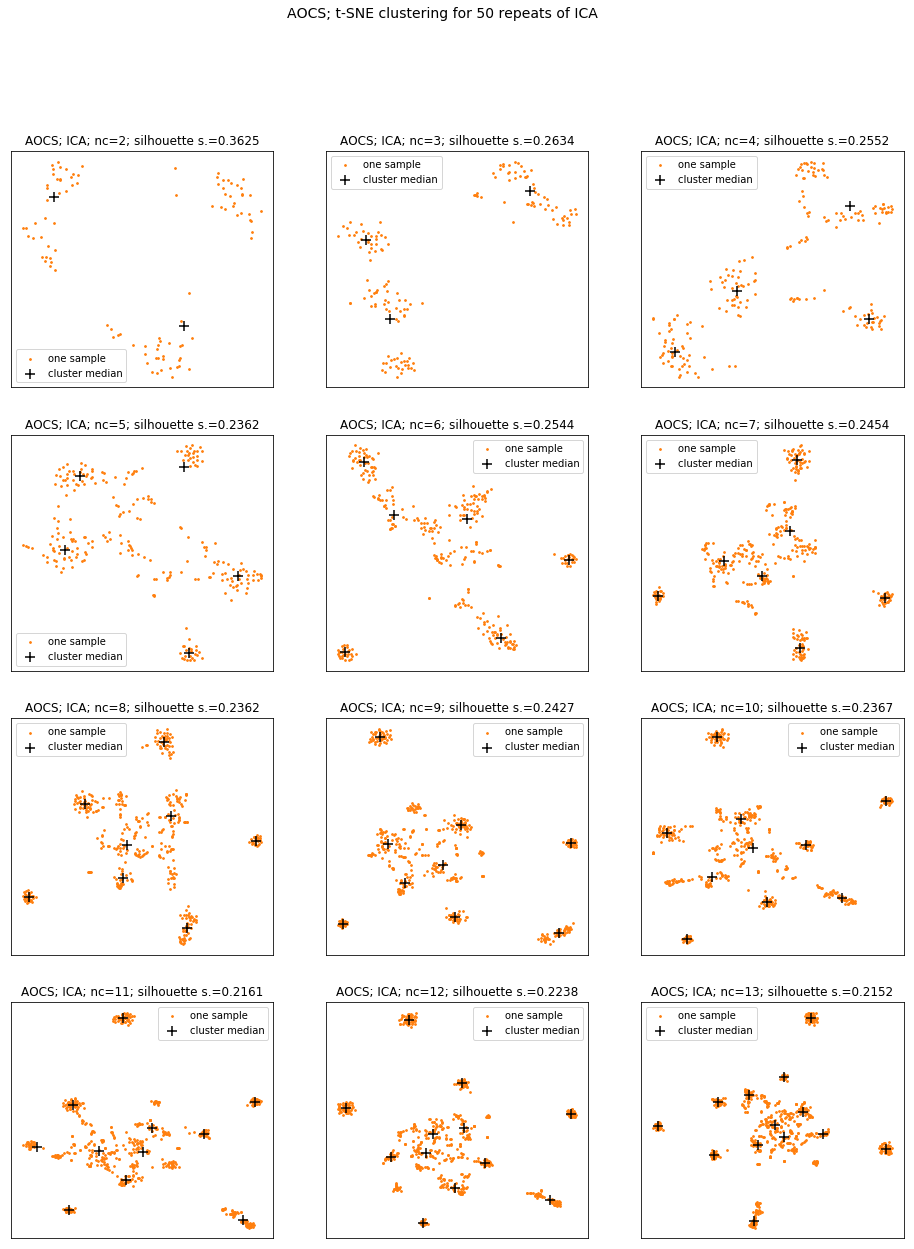

In [8]:
if True:
    fc.plot_multiple_single_factors_scatter(ICA_Factorizer, nc_list)

............

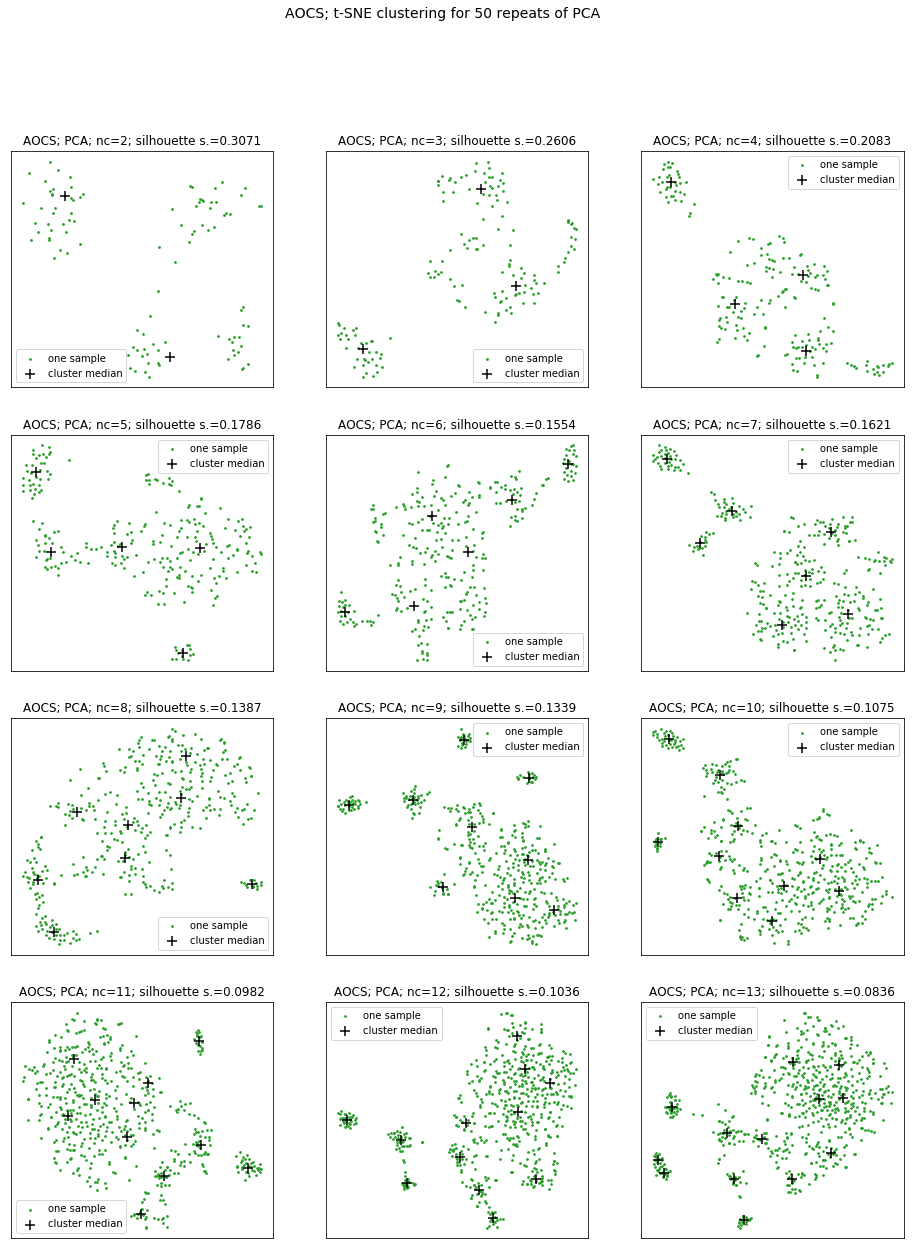

In [9]:
if True:
    fc.plot_multiple_single_factors_scatter(PCA_Factorizer, nc_list)

## t-SNE plots of all three methods together

............

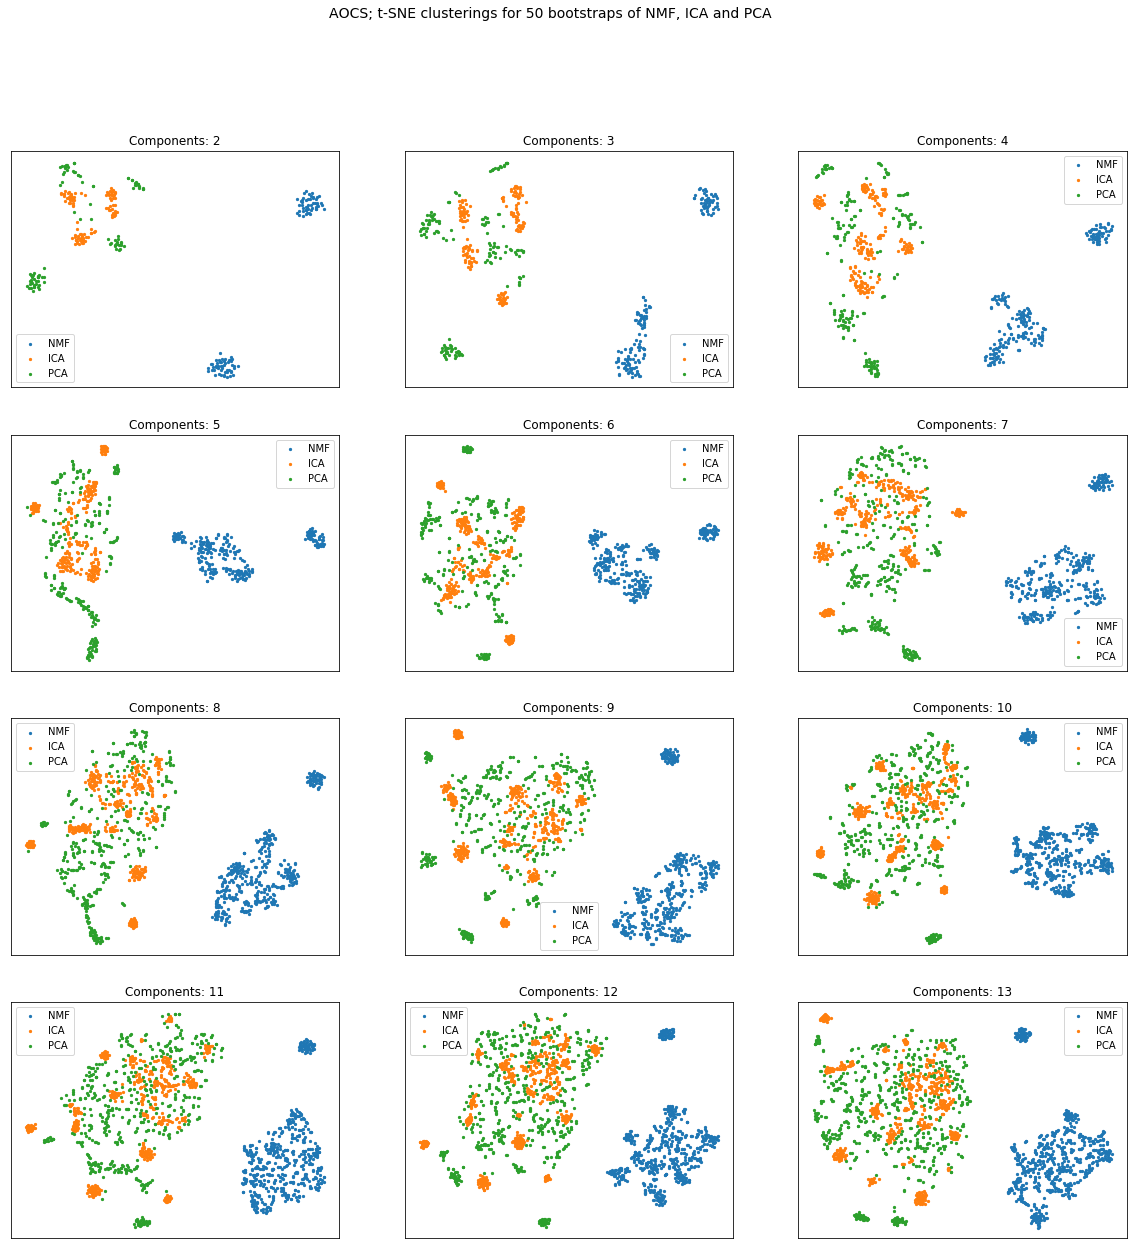

In [10]:
if True:
    fc.plot_multiple_combined_factors_scatter(nc_list)

## Silhouette plots
These indicate robustness of clusters for each number of components.

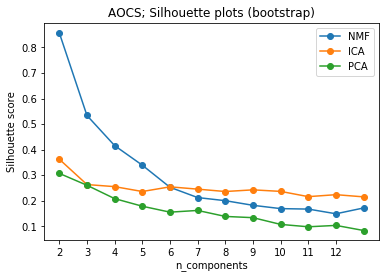

In [11]:
if True:
    fc.plot_silhouette_scores(nc_list, show=True)  
    

In [12]:
if False:
    fc.investigate_multiple_cluster_statistics(nc_list)

# Special code to generate graphics for slides

In [13]:
def special_plot_1(self, nc_list):
    fig = plt.figure(figsize=(24, 16))
    i = 1
    for facto_class in all_factos:
        for nc in nc_list:
            print('.', end='')
            plt.subplot(3, 4, i)
            i += 1
            self.plot_single_factor_scatter(facto_class, nc, show=False)
    plt.suptitle("%s; t-SNE clustering for %d repeats (%s) of NMF, ICA and PCA" %
                 (self.shortname, self.n_repeats, self.method), size=14)
    plt.show()
    
setattr(FactorClustering, 'special_plot_1', special_plot_1)

19730 genes
80 patients
............

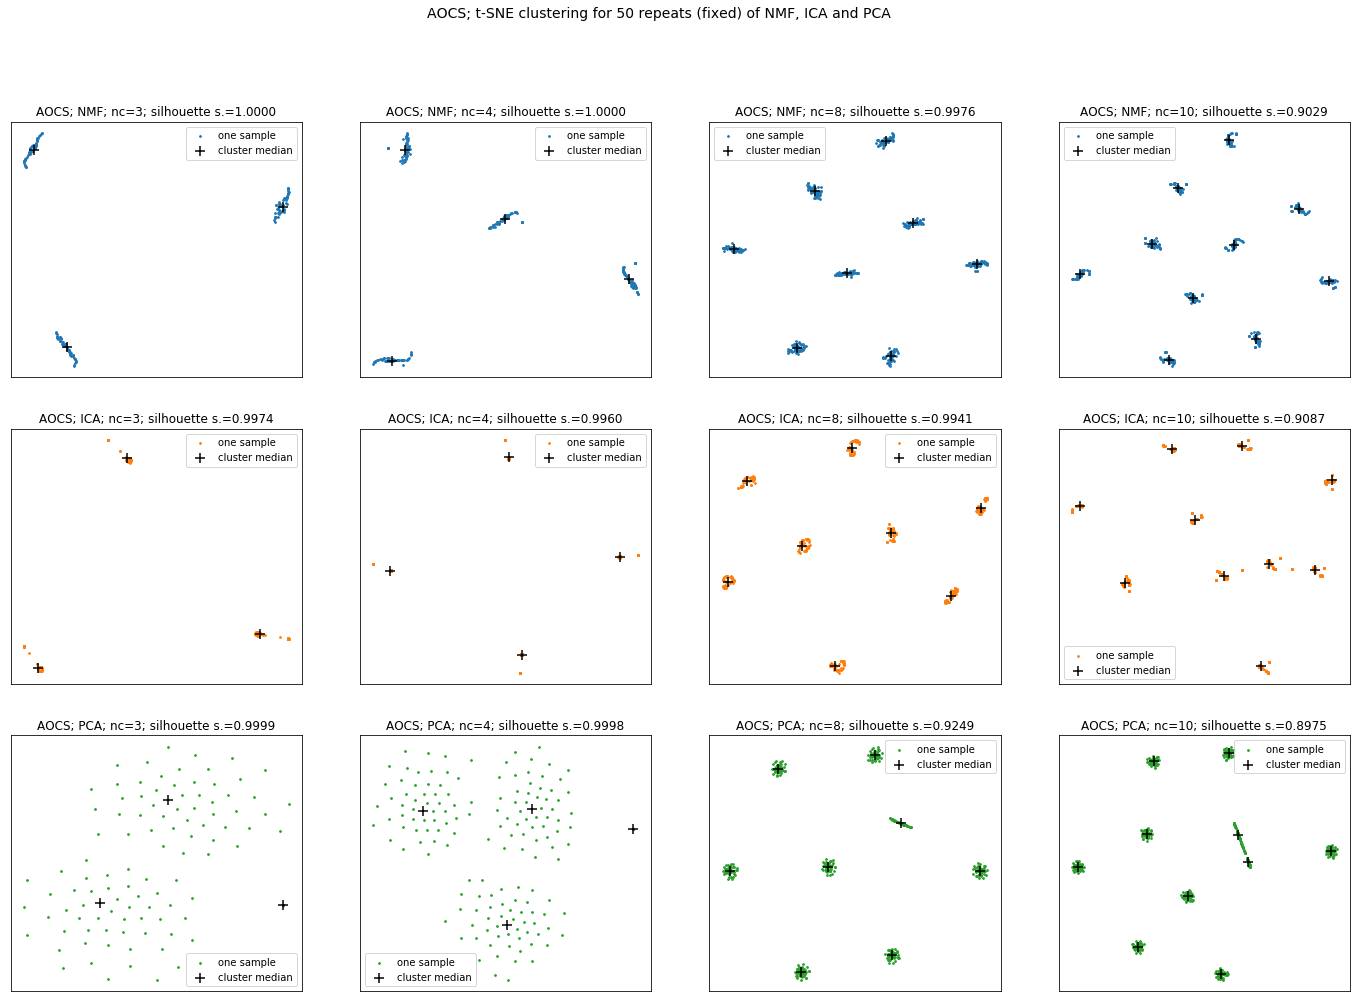

In [14]:
fc = FactorClustering(possible_datasets[2], n_repeats=50, method='fixed')
fc.read_expression_matrix()
fc.special_plot_1([3, 4, 8, 10])

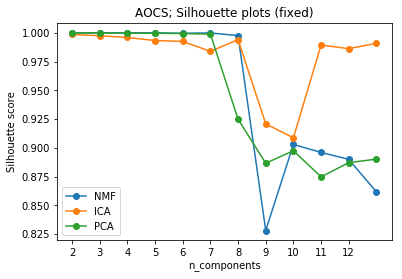

In [15]:
fc.plot_silhouette_scores(nc_list, show=True)

19730 genes
80 patients
............

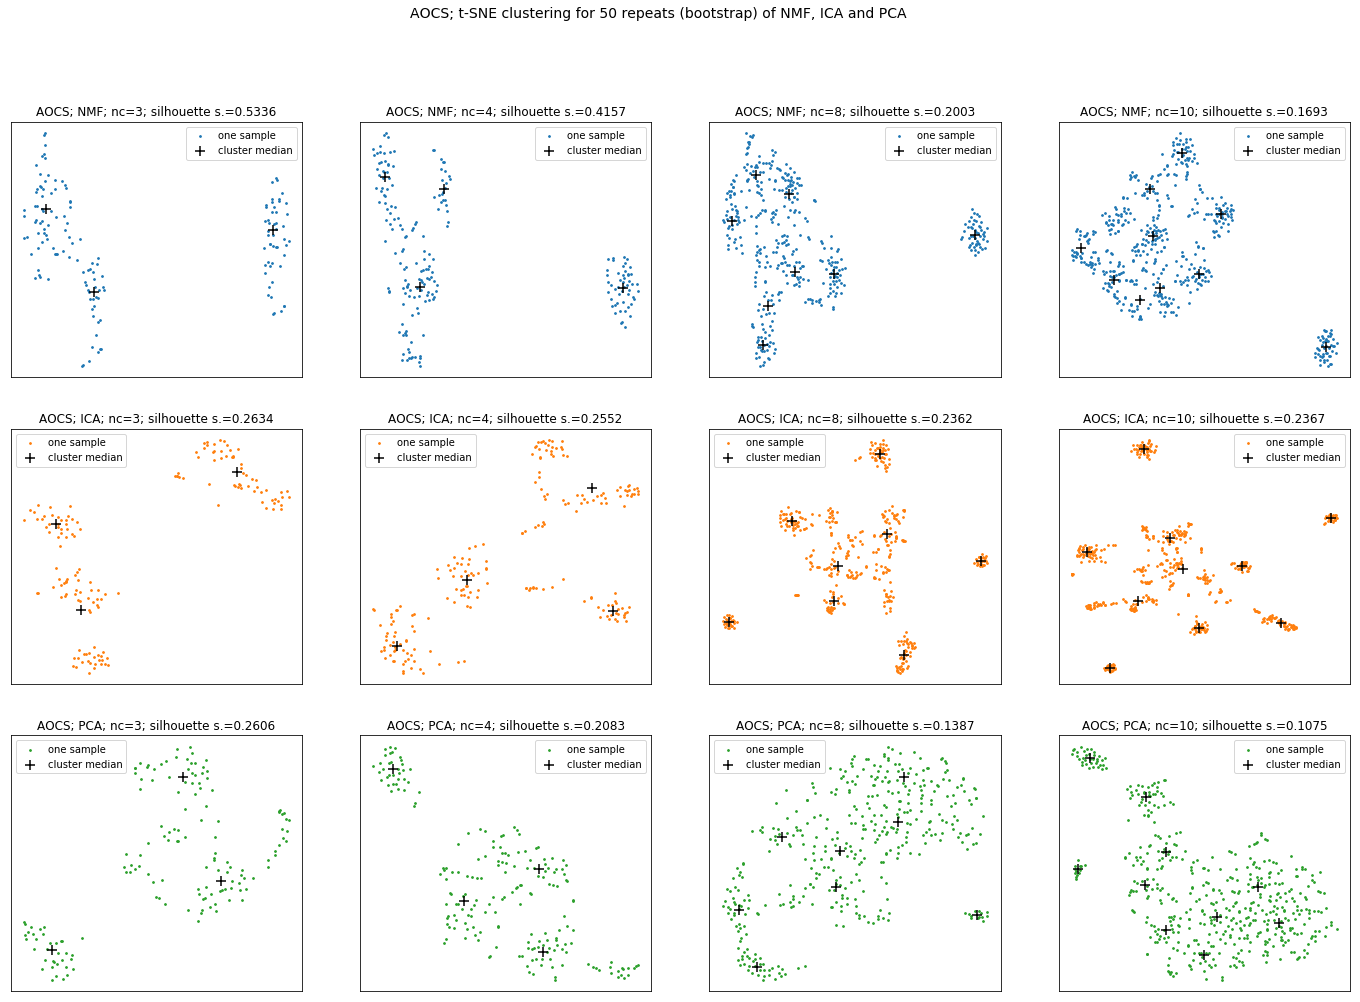

In [16]:
fc = FactorClustering(possible_datasets[2], n_repeats=50, method='bootstrap')
fc.read_expression_matrix()
fc.special_plot_1([3,4,8, 10])

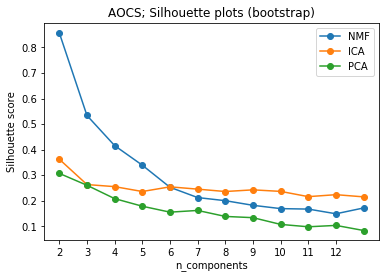

In [17]:
fc.plot_silhouette_scores(nc_list, show=True)

In [ ]:
fc = FactorClustering(possible_datasets[3], n_repeats=50, method='fixed')
fc.read_expression_matrix()
fc.special_plot_1([3,4,8, 10])

19601 genes
374 patients
.........

In [ ]:
fc = FactorClustering(possible_datasets[3], n_repeats=50, method='bootstrap')
fc.read_expression_matrix()
fc.special_plot_1([3,4,8, 10])

In [ ]:
fc.plot_silhouette_scores(nc_list, show=True)

In [ ]:
def special_plot_2(self, nc_list, show=True):
    plt.figure(figsize=(24, 6))
    for i, nc in enumerate(nc_list):
        print('.', end='')
        plt.subplot(1, 4, i + 1)
        self.plot_combined_factors_scatter(nc, show=False)
    plt.suptitle("%s; t-SNE clusterings for %d bootstraps of NMF, ICA and PCA" %
                 (self.shortname, self.n_repeats), size=14)
    if show:
        plt.show()
setattr(FactorClustering, 'special_plot_2', special_plot_2)

In [ ]:
fc = FactorClustering(possible_datasets[3], n_repeats=50, method='bootstrap')
fc.read_expression_matrix()
fc.special_plot_2([3,4,8, 10])

In [ ]:
fc = FactorClustering(possible_datasets[3], n_repeats=50, method='bootstrap')
fc.read_expression_matrix()
plt.figure(figsize=(6,6))
fc.plot_combined_factors_scatter(3, show=False)
plt.title("Three components for NMF, ICA and PCA from  n=374 TCGA dataset with bootstrap resampling")
plt.show()

In [ ]:
def factor_histo(facto_class):   
    nc = 3
    facto_prefix = facto_class.__name__[:3]
    fname = '../Factors/%s/%s_median_factor_%d.csv' % (fc.basename, facto_prefix, nc)
    _, _, median_metagenes = fc.compute_tsne_score_medians(facto_class, nc)
    plt.hist(median_metagenes, bins=100, histtype='step')
    plt.title(facto_prefix)

In [ ]:
plt.figure(figsize=(16,4))
for i, facto in enumerate(all_factos):
    plt.subplot(1, 3, i+1)
    factor_histo(facto)
plt.suptitle("Distributions of factor weights", size=16)
plt.show()
